In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
### : Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 mins 38 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,27 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ggh839
H2O cluster total nodes:,1
H2O cluster free memory:,3.221 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,22 mins 38 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,27 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ggh839
H2O cluster total nodes:,1
H2O cluster free memory:,3.221 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("/Users/avkashchauhan/src/github.com/avkash/mldl/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Understanding Dataset with pylab library

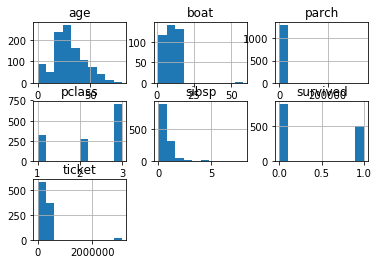

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [15]:
###: Setting Response column

In [16]:
response = "survived"

In [17]:
###: Setting Response column to factor so we can get unique values in it

In [18]:
df['survived'].asfactor().levels()

[['0', '1']]

In [ ]:
###: Understanding Dataset with Seaborn python library using origin as color pclass

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns
sns.set_context("notebook")

## Error due to NAs

sns.pairplot(df.as_data_frame(), vars=["embarked", "survived"], hue="pclass");
plt.show()

In [19]:
###: Setting Response column to factor so we can build classification model

In [20]:
df[response] = df[response].asfactor()

In [21]:
###: Verifying Response column as factor 

In [22]:
df[response].describe()

Rows:1309
Cols:1




,survived
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,1
1,1
2,0


In [23]:
###: Setting all columns/features into a local variable

In [24]:
features = df.col_names

In [25]:
###: Settings all features for model building

In [26]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [27]:
###: Ignoring list of features which are not required for model building

In [28]:
ignore_list = ['name', 'ticket', 'home.dest']
for x in ignore_list:
    features.remove(x)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [29]:
###: Importing H2O Distributed Random Forest library

In [30]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [31]:
###: Setting H2O Distributed Random Forest model configuration (default)

In [32]:
drf_titanic_basic = H2ORandomForestEstimator()

In [33]:
###: Training H2O Distributed Random Forest Model 

In [34]:
drf_titanic_basic.train(x = features, y = response,training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
###: Understanding H2O Distributed Random Forest Model overall performance based on training data

In [36]:
drf_titanic_basic.model_performance(train=True)


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0635641794918
RMSE: 0.252119375479
LogLoss: 0.239379129034
Mean Per-Class Error: 0.0878887515451
AUC: 0.963683559951
Gini: 0.927367119901
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.339064189366: 


,0,1,Error,Rate
0,793.0,16.0,0.0198,(16.0/809.0)
1,78.0,422.0,0.156,(78.0/500.0)
Total,871.0,438.0,0.0718,(94.0/1309.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3390642,0.8997868,166.0
max f2,0.1860318,0.9103208,240.0
max f0point5,0.6003945,0.9464627,134.0
max accuracy,0.3390642,0.9281895,166.0
max precision,1.0,1.0,0.0
max recall,0.0704406,1.0,367.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.3390642,0.8487066,166.0
max min_per_class_accuracy,0.2365440,0.908,213.0
max mean_per_class_accuracy,0.3390642,0.9121112,166.0


Gains/Lift Table: Avg response rate: 38.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0252101,0.9650515,2.618,2.618,1.0,1.0,0.066,0.066,161.8,161.8
,2,0.0916730,0.9601418,2.618,2.618,1.0,1.0,0.174,0.24,161.8,161.8
,3,0.1046600,0.9401418,2.618,2.618,1.0,1.0,0.034,0.274,161.8,161.8
,4,0.1703591,0.9336147,2.618,2.618,1.0,1.0,0.172,0.446,161.8,161.8
,5,0.2009167,0.9185245,2.618,2.618,1.0,1.0,0.08,0.526,161.8,161.8
,6,0.3002292,0.8387419,2.618,2.618,1.0,1.0,0.26,0.786,161.8,161.8
,7,0.4003056,0.2061024,1.8585802,2.4281450,0.7099237,0.9274809,0.186,0.972,85.8580153,142.8145038
,8,0.5003820,0.1368184,0.2797863,1.9984733,0.1068702,0.7633588,0.028,1.0,-72.0213740,99.8473282
,9,0.6012223,0.1176763,0.0,1.6632783,0.0,0.6353240,0.0,1.0,-100.0,66.3278272
,10,0.7043545,0.1130415,0.0,1.4197397,0.0,0.5422993,0.0,1.0,-100.0,41.9739696


In [37]:
###: Understanding H2O Distributed Random Forest Model - AUC Model metrics based on training data

In [38]:
drf_titanic_basic.model_performance(train=True).auc()

0.9636835599505562

In [39]:
###: Setting H2O Distributed Random Forest model configuration to use cross validation with 5 folds

In [40]:
drf_titanic_cv = H2ORandomForestEstimator(nfolds = 5 )

In [41]:
###: Training H2O Distributed Random Forest Model

In [42]:
drf_titanic_cv.train(x = features, y = response,training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
###: Understanding H2O Distributed Random Forest Model overall performance based on cross validation data (r2 only)

In [44]:
drf_titanic_cv.model_performance(xval=True).auc()

0.9606761433868974

In [45]:
###: Plotting H2O Distributed Random Forest Model for its AUC metric 

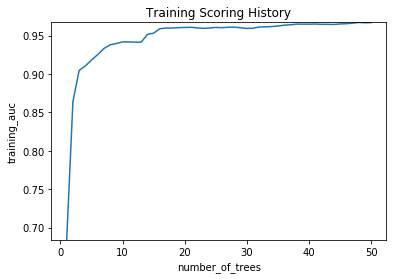

In [46]:
drf_titanic_cv.plot(metric='auc')

In [47]:
###: Generating H2O Distributed Random Forest 

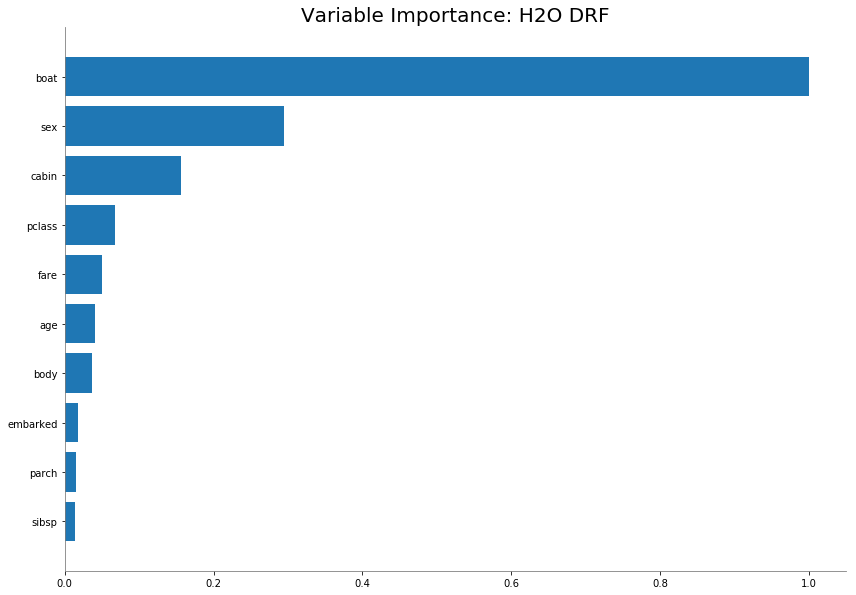

In [48]:
drf_titanic_cv.varimp_plot()

In [49]:
###: Setting H2O Distributed Random Forest model configuration to use cross validation with 5 folds and various other parameters
###: for tuning the performance and accuracy

In [50]:
drf_titanic_cv_tuned = H2ORandomForestEstimator(nfolds = 5,
                                    ntrees=10,
                                    max_depth=3,
                                    min_rows=2,
                                    keep_cross_validation_predictions=True,
                                   seed = 12345)

In [51]:
###: Training H2O Distributed Random Forest Model 

In [52]:
drf_titanic_cv_tuned.train(x = features, y = response, training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
###: Understanding H2O Distributed Random Forest Model overall performance based on cross validation data (AUC only)

In [54]:
print(drf_titanic_basic.model_performance(train=True).auc())
print(drf_titanic_cv.model_performance(xval=True).auc())
print(drf_titanic_cv_tuned.model_performance(xval=True).auc())

0.963683559951
0.960676143387
0.950353522868


In [55]:
###:  H2O Distributed Random Forest Tuned model varialbe importance plot

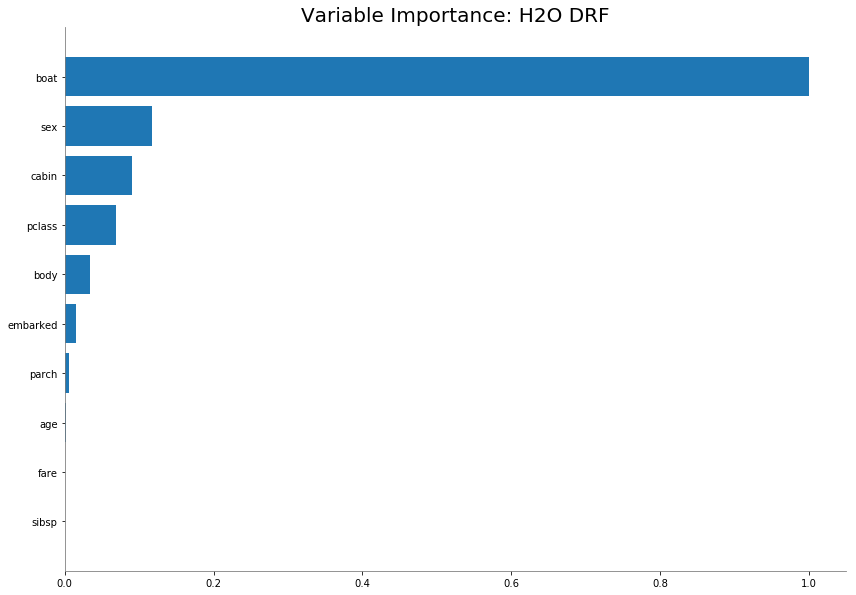

In [56]:
drf_titanic_cv_tuned.varimp_plot()

In [57]:
###:  H2O Distributed Random Forest Tuned model varialbe importance plot

In [58]:
drf_titanic_cv_tuned.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-17 09:37:25,0.196 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-17 09:37:25,0.199 sec,1.0,0.468981,3.016329,0.747661,2.195004,0.285425
2,,2017-11-17 09:37:25,0.202 sec,2.0,0.369714,1.343281,0.844582,2.618000,0.182390
3,,2017-11-17 09:37:25,0.206 sec,3.0,0.332265,0.745711,0.869292,2.618000,0.118902
4,,2017-11-17 09:37:25,0.210 sec,4.0,0.310285,0.546964,0.894127,2.618000,0.102954
5,,2017-11-17 09:37:25,0.214 sec,5.0,0.294225,0.425936,0.915779,2.618000,0.094996
6,,2017-11-17 09:37:25,0.219 sec,6.0,0.283047,0.325113,0.924777,2.618000,0.090244
7,,2017-11-17 09:37:25,0.223 sec,7.0,0.297687,0.331142,0.919938,2.618000,0.095163
8,,2017-11-17 09:37:25,0.227 sec,8.0,0.300955,0.314875,0.918121,2.618000,0.092188
9,,2017-11-17 09:37:25,0.231 sec,9.0,0.297215,0.309309,0.916042,2.618000,0.092248


In [59]:
drf_titanic_cv_tuned.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-17 09:37:25,0.196 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-17 09:37:25,0.199 sec,1.0,0.468981,3.016329,0.747661,2.195004,0.285425
2,,2017-11-17 09:37:25,0.202 sec,2.0,0.369714,1.343281,0.844582,2.618000,0.182390
3,,2017-11-17 09:37:25,0.206 sec,3.0,0.332265,0.745711,0.869292,2.618000,0.118902
4,,2017-11-17 09:37:25,0.210 sec,4.0,0.310285,0.546964,0.894127,2.618000,0.102954
5,,2017-11-17 09:37:25,0.214 sec,5.0,0.294225,0.425936,0.915779,2.618000,0.094996
6,,2017-11-17 09:37:25,0.219 sec,6.0,0.283047,0.325113,0.924777,2.618000,0.090244
7,,2017-11-17 09:37:25,0.223 sec,7.0,0.297687,0.331142,0.919938,2.618000,0.095163
8,,2017-11-17 09:37:25,0.227 sec,8.0,0.300955,0.314875,0.918121,2.618000,0.092188
9,,2017-11-17 09:37:25,0.231 sec,9.0,0.297215,0.309309,0.916042,2.618000,0.092248


In [60]:
### PERFORMING PREDICTIONS USING a TEST DATA SET

In [61]:
###: listing features used for model building from the original data set

In [62]:
features

[u'pclass',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body']

In [63]:
###: listing first 3 rows from the original data set

In [64]:
df.head(3).describe()

Rows:3
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.9167,0.0,0.0,24160.0,151.55,,,2.0,NaN,
mean,1.0,,NaN,,10.6389,0.666666666667,1.33333333333,83907.3333333,171.479166667,,,6.5,0.0,
maxs,1.0,,NaN,,29.0,1.0,2.0,113781.0,211.3375,,,11.0,NaN,
sigma,0.0,,NaN,,15.9104016175,0.57735026919,1.15470053838,51742.708475,34.5183292192,,,6.36396103068,-0.0,
zeros,0,,0,,0,1,1,0,0,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,1,3,0
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [65]:
###: creating test data set based on features used for building model

In [66]:
df_test = h2o.H2OFrame.from_python({"pclass":2, "sex" : 'male', "age" : 28, 
                                    "sibsp" : 1, "parch" : 2, "fare" : 321.9, "boat": 2, 'body' : 123,
                                   "embarked" : 'S', "cabin": "B5"})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
type(df_test)

h2o.frame.H2OFrame

In [68]:
###: Performing prediction using one of the best Distributed Random Forest model we built earlier

In [69]:
drf_titanic_cv_tuned.predict(df_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.330172,0.669828


In [70]:
###: Looking at the histogram of response variable from original data set

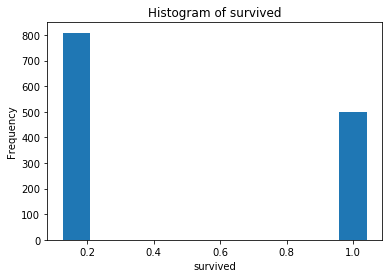

In [71]:
df[response].asnumeric().hist()